In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [0]:
def ANNmodel(input_shape):
  X_input = Input(input_shape, name='Input_Layer')

  X = Flatten(name = 'Flatten')(X_input)
  X = Dense(32, name = 'FC_1')(X)
  X = BatchNormalization(axis = -1, name = 'BN_1')(X)
  X = Activation('relu', name='ReLu_1')(X)
  X = Dropout(0.2, name='Dropout_1')(X)

  X = Dense(64, name = 'FC_2')(X)
  X = BatchNormalization(axis = -1, name = 'BN_2')(X)
  X = Activation('relu', name='ReLu_2')(X)
  X = Dropout(0.2, name='Dropout_2')(X)

  X = Dense(64, name = 'FC_3')(X)
  X = BatchNormalization(axis = -1, name = 'BN_3')(X)
  X = Activation('relu', name='ReLu_3')(X)
  X = Dropout(0.2, name='Dropout_3')(X)

  X = Dense(128, name = 'FC_4')(X)
  X = BatchNormalization(axis = -1, name = 'BN_4')(X)
  X = Activation('relu', name='ReLu_4')(X)
  X = Dropout(0.2, name='Dropout_4')(X)

  X = Dense(128, name = 'FC_5')(X)
  X = BatchNormalization(axis = -1, name = 'BN_5')(X)
  X = Activation('relu', name='ReLu_5')(X)
  X = Dropout(0.2, name='Dropout_5')(X)

  X = Dense(256, name = 'FC_6')(X)
  X = BatchNormalization(axis = -1, name = 'BN_6')(X)
  X = Activation('relu', name='ReLu_6')(X)
  X = Dropout(0.2, name='Dropout_6')(X)

  X = Dense(1, activation = 'sigmoid', name = 'OUT')(X)

  model = Model(inputs = X_input, outputs = X, name='ANN_Model')

  return model

In [4]:
model = ANNmodel((256,256,3))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "ANN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     (None, 256, 256, 3)       0         
_________________________________________________________________
Flatten (Flatten)            (None, 196608)            0         
_________________________________________________________________
FC_1 (Dense)                 (None, 32)                6291488   
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 32)                128       
_________________________________________________________________
ReLu_1 (Activation)          (None, 32)                0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 32)                0         
____

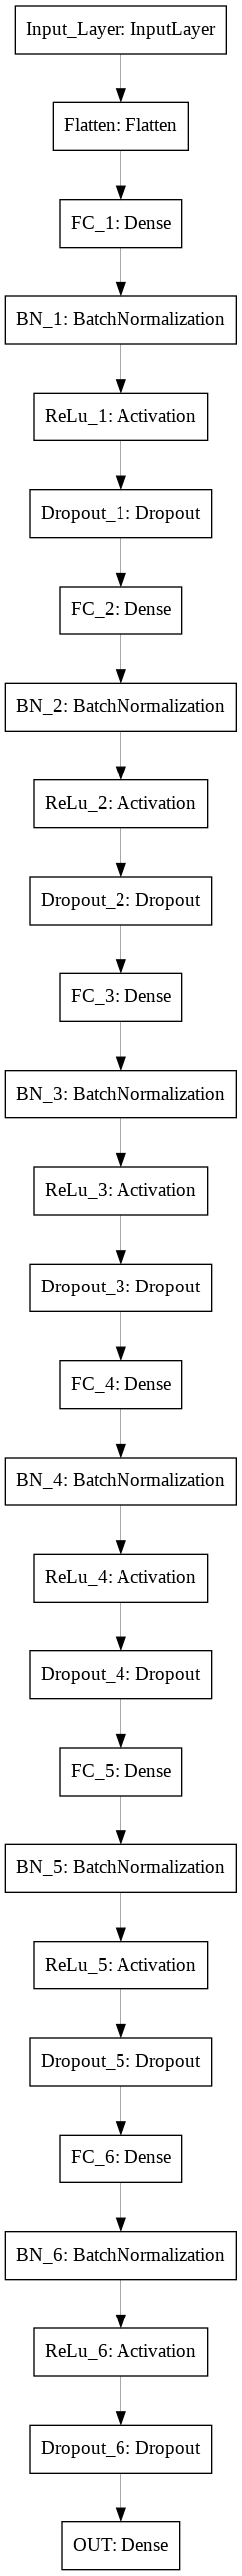

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

# TRAINING ANN

In [6]:
!unzip 'drive/My Drive/Colab Notebooks/TRAINING_v2.zip'

Archive:  drive/My Drive/Colab Notebooks/TRAINING_v2.zip
   creating: TRAIN/
   creating: TRAIN/TRUE/
  inflating: TRAIN/TRUE/0.jpg        
  inflating: TRAIN/TRUE/1.jpg        
  inflating: TRAIN/TRUE/2.jpg        
  inflating: TRAIN/TRUE/3.jpg        
  inflating: TRAIN/TRUE/4.jpg        
  inflating: TRAIN/TRUE/6.jpg        
  inflating: TRAIN/TRUE/7.jpg        
  inflating: TRAIN/TRUE/9.jpg        
  inflating: TRAIN/TRUE/11.jpg       
  inflating: TRAIN/TRUE/12.jpg       
  inflating: TRAIN/TRUE/13.jpg       
  inflating: TRAIN/TRUE/14.jpg       
  inflating: TRAIN/TRUE/15.jpg       
  inflating: TRAIN/TRUE/16.jpg       
  inflating: TRAIN/TRUE/18.jpg       
  inflating: TRAIN/TRUE/22.jpg       
  inflating: TRAIN/TRUE/23.jpg       
  inflating: TRAIN/TRUE/24.jpg       
  inflating: TRAIN/TRUE/28.jpg       
  inflating: TRAIN/TRUE/29.jpg       
  inflating: TRAIN/TRUE/30.jpg       
  inflating: TRAIN/TRUE/31.jpg       
  inflating: TRAIN/TRUE/32.jpg       
  inflating: TRAIN/TRUE/

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    #shear_range=0.01,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    'TRAIN',
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=128,
    class_mode="binary",
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    'VAL',
    target_size=(256, 256),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 60,
    shuffle = False
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Found 2407 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=19,
        epochs=100,
        validation_data=val_generator,
        validation_steps=2
        )

model.save("drive/My Drive/Colab Notebooks/ANN_v2_beta.h5")
print("Saved model to disk")

loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc_train = history.history['acc']
acc_val = history.history['val_acc']
df_hist = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'acc_train':acc_train, 'acc_val':acc_val})
df_hist.to_csv('drive/My Drive/Colab Notebooks/ANN_v2_history.csv')




Epoch 1/100





19/19 [==============================] - 35s 2s/step - loss: 0.7157 - acc: 0.5565 - val_loss: 0.9241 - val_acc: 0.5250
Epoch 2/100
 6/19 [========>.....................] - ETA: 22s - loss: 0.6693 - acc: 0.6172

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-54afad81ecea>", line 6, in <module>
    validation_steps=2
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1658, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py", line 181, in fit_generator
    generator_output = next(output_generator)
  File "/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py", line 603, in get
    inputs = future.get(timeout=30)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 638, in get
    self.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 635, in wait
    self.

KeyboardInterrupt: ignored

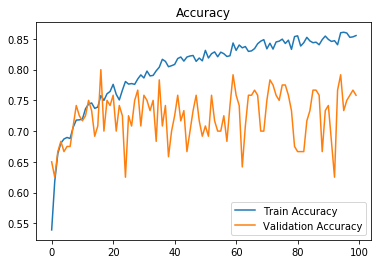

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('accuracy')

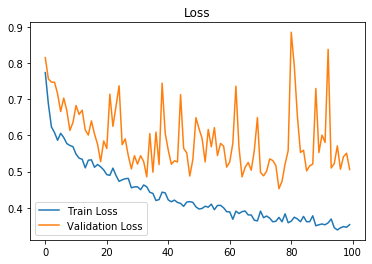

In [0]:
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.savefig('loss.png')
plt.show()


VAL FALSE : 41/60

VAL TRUE : 50/60

TRAIN FALSE : 941/1106

TRAIN TRUE : 1218/1301

In [0]:
(941+1218) / (1106+1301) * 100

89.6967179061072

In [0]:
i = 0
j = 0
dirr = 'TRAIN/TRUE/'
for path in os.listdir(dirr):
  img = load_img(dirr + path)  # this is a PIL image
  x = img_to_array(img)/255  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
  prob = model.predict(x)
  prob[prob >= 0.5] = 1
  prob[prob < 0.5] = 0

  if prob == 1:
    j += 1
  
  i += 1

print(i)
print(j)

1301
1218
